In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

saskylakh ru
cape town za
ushuaia ar
bredasdorp za
bull savanna jm
ponta do sol cv
port-gentil ga
thompson ca
illoqqortoormiut gl
chatra in
yeppoon au
pinhao br
forssa fi
kapaa us
nizhneyansk ru
coquimbo cl
faanui pf
illoqqortoormiut gl
taolanaro mg
lentate sul seveso it
busselton au
albany au
provideniya ru
wilmington us
kifri iq
grand river south east mu
milos gr
albany au
krasnoselkup ru
guerrero negro mx
ahipara nz
aginskoye ru
qaanaaq gl
mataura pf
grindavik is
punta arenas cl
belushya guba ru
hasaki jp
ilulissat gl
busselton au
cape town za
butaritari ki
maarianhamina fi
khatanga ru
saldanha za
kibaya tz
birjand ir
elmadag tr
maniitsoq gl
santa maria cv
kirakira sb
qaanaaq gl
mataura pf
falmouth gb
butaritari ki
quatre cocos mu
sitka us
puerto escondido mx
quezada gt
druzhba ua
rupert us
haapiti pf
kikwit cd
chapeco br
albany au
ponta do sol cv
rikitea pf
butaritari ki
burnie au
vaini to
leningradskiy ru
bluff nz
shache cn
mataura pf
marystown ca
princeton ca
punta arenas cl
tour

chuy uy
cabo san lucas mx
portland au
busselton au
port hueneme us
saint anthony ca
bluff nz
kisangani cd
skibbereen ie
lemesos cy
cape town za
severo-kurilsk ru
ushuaia ar
richards bay za
ushuaia ar
khani ru
georgetown sh
chuy uy
illoqqortoormiut gl
mango tg
gedo et
itarema br
khatanga ru
touros br
avarua ck
areka et
thompson ca
luderitz na
vaini to
matara lk
kidal ml
codrington ag
mataura pf
bluff nz
sharan ru
rikitea pf
makakilo city us
avarua ck
puerto ayora ec
port alfred za
abu kamal sy
castro cl
taolanaro mg
terryville us
butaritari ki
tanete id
chuy uy
barrow us
vaini to
mataura pf
aripuana br
mayo ca
pout sn
upernavik gl
tsihombe mg
albany au
rikitea pf
faanui pf
saint-philippe re
esil kz
luderitz na
ushuaia ar
yellowknife ca
kalianget id
sitka us
bokspits bw
shumskiy ru
severo-kurilsk ru
barentsburg sj
carnarvon au
tateyama jp
hasaki jp
bereda so
raudeberg no
saint george bm
ribeira grande pt
ternate id
vaini to
puerto ayora ec
tuatapere nz
albany au
hit iq
rikitea pf
cidreir

cape town za
atuona pf
ushuaia ar
inuvik ca
olafsvik is
vaini to
illoqqortoormiut gl
tual id
fort collins us
bredasdorp za
myrtle beach us
punta arenas cl
tiksi ru
kadambur in
vaini to
casimiro castillo mx
taolanaro mg
taolanaro mg
tuktoyaktuk ca
mataura pf
chuy uy
asau tv
hilo us
ahuimanu us
luderitz na
comodoro rivadavia ar
chokurdakh ru
albany au
taolanaro mg
port hardy ca
dikson ru
mehamn no
walvis bay na
antalaha mg
hamilton bm
yellowknife ca
dubenskiy ru
hermanus za
simpang id
hasaki jp
ribeira grande pt
punta arenas cl
inirida co
irpa irpa bo
neepawa ca
punta arenas cl
illoqqortoormiut gl
tarnow pl
kilembe ug
viamao br
attawapiskat ca
chokurdakh ru
saint-denis re
busselton au
guanica us
asbury park us
meulaboh id
hermanus za
dikson ru
taolanaro mg
clyde river ca
busselton au
puerto ayora ec
inuvik ca
san cristobal ec
bethel us
lavrentiya ru
dunedin nz
esperance au
provideniya ru
dawlatabad af
port alfred za
aksum et
bredasdorp za
hilo us
mataura pf
tasiilaq gl
airai pw
bethel us

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | bull savanna
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | port-gentil
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | chatra
Processing Record 11 of Set 1 | yeppoon
Processing Record 12 of Set 1 | pinhao
Processing Record 13 of Set 1 | forssa
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | coquimbo
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | lentate sul seveso
Processing Record 20 of Set 1 | busselton
Processing Record 21

Processing Record 41 of Set 4 | khushab
Processing Record 42 of Set 4 | bataipora
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | sawakin
Processing Record 45 of Set 4 | tigil
Processing Record 46 of Set 4 | ucluelet
Processing Record 47 of Set 4 | port elizabeth
Processing Record 48 of Set 4 | antofagasta
Processing Record 49 of Set 4 | lewiston
Processing Record 50 of Set 4 | namatanai
Processing Record 1 of Set 5 | valdez
Processing Record 2 of Set 5 | hilo
Processing Record 3 of Set 5 | dargaville
Processing Record 4 of Set 5 | imeni poliny osipenko
Processing Record 5 of Set 5 | urazovka
Processing Record 6 of Set 5 | bafoulabe
Processing Record 7 of Set 5 | zhigansk
Processing Record 8 of Set 5 | beian
Processing Record 9 of Set 5 | patea
Processing Record 10 of Set 5 | malaya vishera
Processing Record 11 of Set 5 | salinopolis
Processing Record 12 of Set 5 | utiroa
City not found. Skipping...
Processing Record 13 of Set 5 | edson
Processing Record 14 o

Processing Record 30 of Set 8 | bokspits
City not found. Skipping...
Processing Record 31 of Set 8 | shumskiy
Processing Record 32 of Set 8 | tateyama
Processing Record 33 of Set 8 | bereda
Processing Record 34 of Set 8 | raudeberg
Processing Record 35 of Set 8 | ternate
Processing Record 36 of Set 8 | tuatapere
Processing Record 37 of Set 8 | hit
Processing Record 38 of Set 8 | cidreira
Processing Record 39 of Set 8 | talcahuano
Processing Record 40 of Set 8 | nalut
Processing Record 41 of Set 8 | ponta delgada
Processing Record 42 of Set 8 | bilibino
Processing Record 43 of Set 8 | hualmay
Processing Record 44 of Set 8 | hearst
Processing Record 45 of Set 8 | emerald
Processing Record 46 of Set 8 | acacias
Processing Record 47 of Set 8 | salalah
Processing Record 48 of Set 8 | onega
Processing Record 49 of Set 8 | anadyr
Processing Record 50 of Set 8 | margate
Processing Record 1 of Set 9 | anloga
Processing Record 2 of Set 9 | eyl
Processing Record 3 of Set 9 | kuala terengganu
Proc

Processing Record 19 of Set 12 | nemuro
Processing Record 20 of Set 12 | bangangte
Processing Record 21 of Set 12 | freeport
Processing Record 22 of Set 12 | dudinka
Processing Record 23 of Set 12 | sao filipe
Processing Record 24 of Set 12 | bismarck
Processing Record 25 of Set 12 | turukhansk
Processing Record 26 of Set 12 | kintampo
Processing Record 27 of Set 12 | saint-joseph
Processing Record 28 of Set 12 | crestview
Processing Record 29 of Set 12 | clyde river
Processing Record 30 of Set 12 | puerto princesa
Processing Record 31 of Set 12 | korla
Processing Record 32 of Set 12 | la poza
Processing Record 33 of Set 12 | javanrud
Processing Record 34 of Set 12 | mandalgovi
Processing Record 35 of Set 12 | verkhoyansk
Processing Record 36 of Set 12 | priargunsk
Processing Record 37 of Set 12 | hambantota
Processing Record 38 of Set 12 | sydney
Processing Record 39 of Set 12 | victoria
Processing Record 40 of Set 12 | kieta
Processing Record 41 of Set 12 | minab
Processing Record 42

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,-25.44,100,67,2.15,RU,2022-04-05 19:14:23
1,Cape Town,-33.9258,18.4232,60.89,85,16,3.00,ZA,2022-04-05 19:14:23
2,Ushuaia,-54.8000,-68.3000,38.86,81,75,26.46,AR,2022-04-05 19:14:24
3,Bredasdorp,-34.5322,20.0403,60.96,68,0,14.47,ZA,2022-04-05 19:12:58
4,Bull Savanna,17.8868,-77.5902,83.44,57,62,18.05,JM,2022-04-05 19:14:24
5,Ponta Do Sol,32.6667,-17.1000,61.72,65,43,7.65,PT,2022-04-05 19:13:09
6,Port-Gentil,-0.7193,8.7815,81.32,79,22,12.62,GA,2022-04-05 19:14:24
7,Thompson,55.7435,-97.8558,37.56,75,75,14.97,CA,2022-04-05 19:14:25
8,Chatra,24.2167,84.8667,75.92,8,21,2.08,IN,2022-04-05 19:14:25
9,Yeppoon,-23.1333,150.7333,69.58,75,6,13.18,AU,2022-04-05 19:14:25


In [16]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

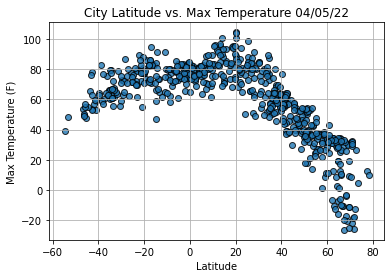

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [20]:
len(city_data_df)

581

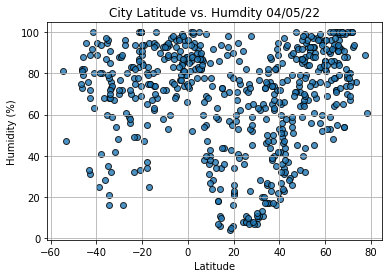

In [21]:
# Build the scatter plot for latitude versus humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humdity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

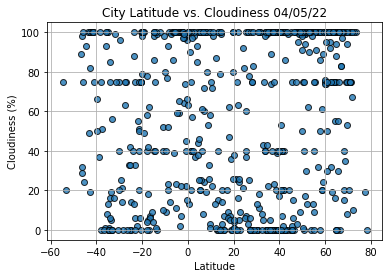

In [22]:
# Build the scatter plot for latitude versus cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

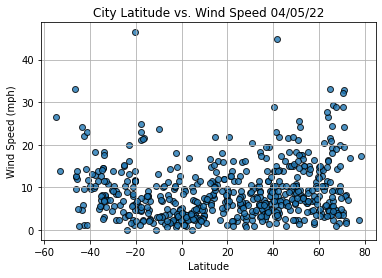

In [23]:
# Build the scatter plot for latitude versus wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()